## Check your runtime environment

Usually it is recommended to use GPU to train a CNN. Based on our dataset, it takes ~1min to train a single epoch using CPU, while only 10s when using a GPU.

In [1]:
# 判断这个图片的数字是多少： 0-9

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.3.1'

In [4]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU')]

In [5]:
tf.test.gpu_device_name()

''

In [6]:
import numpy as np
import collections
import matplotlib.pyplot as plt

%matplotlib inline

In [20]:
def show_image(img):
    plt.imshow(img, cmap='Greys')
    plt.show()

## Load Dataset

In [9]:
from tensorflow.keras.datasets import mnist

In [12]:
# mnist.load_data??

In [13]:
%time
(x_train, y_train), (x_test, y_test) = mnist.load_data()

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.2 µs


In [14]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [18]:
stats = collections.Counter(y_train)
sorted(stats.items(), key=lambda x: x[0])

[(0, 5923),
 (1, 6742),
 (2, 5958),
 (3, 6131),
 (4, 5842),
 (5, 5421),
 (6, 5918),
 (7, 6265),
 (8, 5851),
 (9, 5949)]

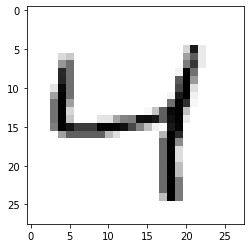

label:  4


In [25]:
image_index = 2
show_image(x_train[image_index])
print("label: ", y_train[image_index])

In [26]:
print(x_train.dtype)

uint8


## Input preprocessing

- Reshape dataset by adding channel dimension (as required by Keras API)
- Normalize data

In [27]:
# Image input: [batch_size, width, height, # channels]
x_train_processed = np.expand_dims(x_train, -1).astype('float32')
x_test_processed = np.expand_dims(x_test, -1).astype('float32')
print(x_train_processed.shape, x_test_processed.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [28]:
x_train_processed.max()

255.0

In [29]:
x_train_processed.min()

0.0

In [30]:
# Normalization
x_train_processed /= 255.0
x_test_processed /= 255.0

In [31]:
print(x_train_processed.max())

1.0


## Build (Vanila) Deep Neural Network

We will build a netowrk with the following layers:
- Dense layer with (512, 256, 10)
- Output layer with softmax

In [32]:
from tensorflow.keras.models import Sequential

In [33]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [39]:
# Sequential?
# Dense?
# Dropout??

In [40]:
dnn = Sequential()
# [batch_size, 28, 28, 1] => [batch_size, 28 * 28 * 1]
dnn.add(Flatten(input_shape=(28, 28, 1)))
dnn.add(Dense(512, activation='relu'))
dnn.add(Dense(256, activation='sigmoid'))
dnn.add(Dropout(rate=0.2))
dnn.add(Dense(10, activation='softmax'))

In [41]:
dnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [42]:
dnn.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [44]:
# dnn.fit?

In [45]:
# epochs: training # of times over the whole dataset.
dnn_history = dnn.fit(
    x=x_train_processed,
    y=y_train,
    validation_data=(x_test_processed, y_test),
    batch_size=512,
    epochs=5)

Epoch 1/5
118/118 [==============================] - 4s 35ms/step - loss: 0.5544 - accuracy: 0.8397 - val_loss: 0.2259 - val_accuracy: 0.9337
Epoch 2/5
118/118 [==============================] - 4s 34ms/step - loss: 0.2015 - accuracy: 0.9413 - val_loss: 0.1551 - val_accuracy: 0.9547
Epoch 3/5
118/118 [==============================] - 4s 35ms/step - loss: 0.1379 - accuracy: 0.9599 - val_loss: 0.1105 - val_accuracy: 0.9670
Epoch 4/5
118/118 [==============================] - 4s 34ms/step - loss: 0.1030 - accuracy: 0.9696 - val_loss: 0.0913 - val_accuracy: 0.9721
Epoch 5/5
118/118 [==============================] - 4s 33ms/step - loss: 0.0795 - accuracy: 0.9769 - val_loss: 0.0824 - val_accuracy: 0.9740


In [46]:
dnn_history.history

{'loss': [0.5543762445449829,
  0.20145325362682343,
  0.13791999220848083,
  0.10303124785423279,
  0.07949524372816086],
 'accuracy': [0.8396666646003723,
  0.9412833452224731,
  0.9598666429519653,
  0.9696499705314636,
  0.9769166707992554],
 'val_loss': [0.22589531540870667,
  0.1551302820444107,
  0.11052032560110092,
  0.09126371145248413,
  0.08240173757076263],
 'val_accuracy': [0.9337000250816345,
  0.9546999931335449,
  0.9670000076293945,
  0.972100019454956,
  0.9739999771118164]}

In [50]:
def plot_history(history, metrics):
    for metric in metrics:
        plt.plot(history[metric], '-o', label=metric)
        plt.legend()
    plt.show()

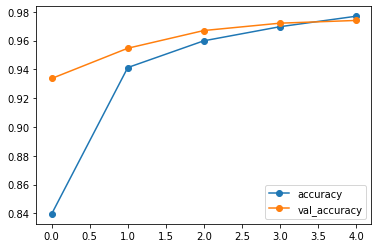

In [51]:
plot_history(dnn_history.history, ['accuracy', 'val_accuracy'])

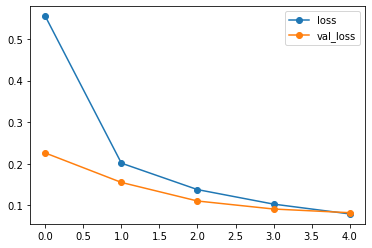

In [52]:
plot_history(dnn_history.history, ['loss', 'val_loss'])

## Build the Convolutional Neural Network

We will build a netowrk with the following layers:
- Convolutional layer with 16 3X3 kernels
- Max Pooling layer with 2X2 tile
- Flatten layer to convert 2D image into a 1D vector
- Fully connected layer with 128 units
- Output layer with softmax

## Compile and train the model

In [56]:
# Conv2D??
# MaxPool2D??

In [57]:
cnn = Sequential()
# [batch_size, 28, 28, 1]

# First Conv-Pool
cnn.add(Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), input_shape=(28, 28, 1)))
cnn.add(MaxPool2D(pool_size=(2, 2)))

# Second Conv-pool
# cnn.add(Conv2D(filters=32, kernel_size=(5, 5), strides=(1, 1)))
# cnn.add(MaxPool2D(pool_size=(2, 2)))

cnn.add(Flatten())
cnn.add(Dense(units=128, activation='relu'))
# cnn.add(Dense(units=64, activation='relu'))
cnn.add(Dense(units=10, activation='softmax'))

In [58]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               346240    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 347,690
Trainable params: 347,690
Non-trainable params: 0
_________________________________________________________________


In [59]:
cnn.compile(optimizer='sgd', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [60]:
# epochs: training # of times over the whole dataset.
cnn_history = cnn.fit(
    x=x_train_processed,
    y=y_train,
    validation_data=(x_test_processed, y_test),
    batch_size=256,
    epochs=3
)

Epoch 1/3
235/235 [==============================] - 17s 71ms/step - loss: 1.3866 - accuracy: 0.6779 - val_loss: 0.5640 - val_accuracy: 0.8632
Epoch 2/3
235/235 [==============================] - 17s 74ms/step - loss: 0.4579 - accuracy: 0.8783 - val_loss: 0.3654 - val_accuracy: 0.9009
Epoch 3/3
235/235 [==============================] - 17s 74ms/step - loss: 0.3570 - accuracy: 0.8991 - val_loss: 0.3133 - val_accuracy: 0.9120


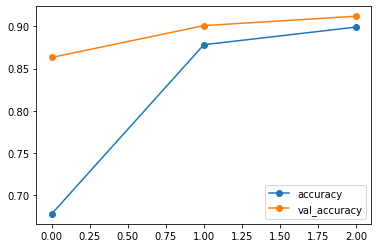

In [61]:
plot_history(cnn_history.history, ['accuracy', 'val_accuracy'])

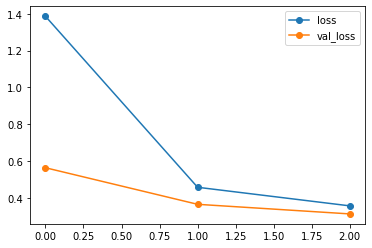

In [62]:
plot_history(cnn_history.history, ['loss', 'val_loss'])

## Predict

test label:  3


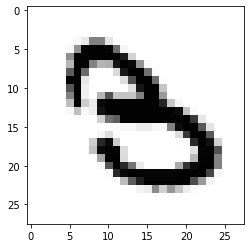

In [107]:
test_index = 18
test_image = x_test[test_index]
print("test label: ", y_test[test_index])
show_image(test_image)

In [110]:
# 关于prediction的概率为1的问题的解释
# 代码是没错的，因为MNIST比较简单，所以CNN很confident判断图像里数字的值，DNN就有些小数

test_image_input = np.reshape(test_image, [1, 28, 28, 1])
# DNN prob: 
probs = dnn.predict(test_image_input).round(4).ravel()
print(probs)
pred = np.argmax(probs)
print("prediction: ", pred)

# CNN prob:
probs = cnn.predict(test_image_input).round(4).ravel()
print(probs)
pred = np.argmax(probs)
print("prediction: ", pred)

[0.00e+00 0.00e+00 3.00e-04 9.82e-01 0.00e+00 1.00e-04 0.00e+00 0.00e+00
 1.75e-02 1.00e-04]
prediction:  3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
prediction:  3
